# Numpy

## general concepts

ndarray object is the core of NumPy - n-dimensional arrys of homogeneous data types.
NumPy arrays have a fixed size at creation. Elements are all of the same data type.

## ndarray object
```python
import numpy as np

# create arrays using array function from a python list or tuple
a = np.array([1, 2, 3])

# properties
n.ndim, a.shape, a.size, a.dtype

# initialize ndarray object
np.zeros((3,4)) 
a.fill(0)
np.zeros((2,3,4)) # row 3 col 4 depth 2
np.zeros_like(a) # an array of zeros with the same shape and type as a
np.ones((2,3), dtype = np.int16)
np.ones_like(a) # an array of ones with the same shape and type as a
np.eye(2) # array([[ 1.,  0.],
                 # [ 0.,  1.]])
                 
np.diag(np.array([1, 2])) # array([[1, 0],
                                 # [0, 2]])

a = np.random.random((2, 3))

np.arange(10, 30, 5) # [10, 15, 20, 25]
np.linspace(0, 2, 5) # [0., 0.5, 1., 1.5, 2.]
```

# basic data types
```python
a = np.array([1, 2, 3])
a.dtype # dtype('int64')

b = np.array([1., 2., 3.])
b.dtype # dtype('float64')

a = np.ones((3, 3)) # the default data type is floating point
a.dtype # dtype('float64')

c = np.array([1, 2, 3], dtype=float) # can explicitly specify data-type 
c.dtype # dtype('float64')
```
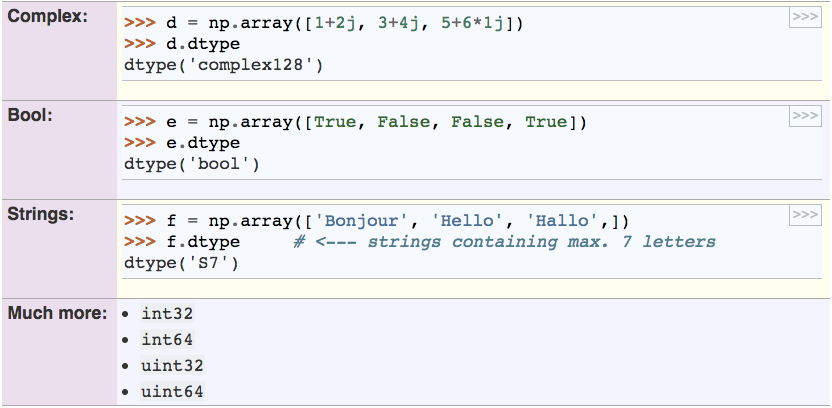

In [8]:
import numpy as np
np.diag(np.array([1, 2]))
a = np.ones((3, 3))
a.dtype

dtype('float64')

## numerical operations
Arithmetic operators on array apply elementwise
```python
# product operate * operates elementwise in NumPy arrays
A*B # elementwise product
A.dot(B), np.dot(A, B) # matrix product

# comparisons
a = np.array([1, 2, 3, 4]) 
b = np.array([4, 2, 2, 4]) 
a == b # array([False,  True, False,  True], dtype=bool)
a > b # array([False, False,  True, False], dtype=bool)

np.array_equal(a, b) # False

# logical operations
a = np.array([1, 1, 0, 0], dtype=bool) 
b = np.array([1, 0, 1, 0], dtype=bool) 

np.logical_or(a, b)  # array([ True,  True,  True, False], dtype=bool)
np.logical_and(a, b) # array([ True, False, False, False], dtype=bool)

```

In [17]:
a = np.array([1, 2, 3, 4]) 
b = np.array([4, 2, 2, 4]) 
np.array_equal(a, b) 

False

## broadcasting
The image below gives an exapmle of broadcasting.
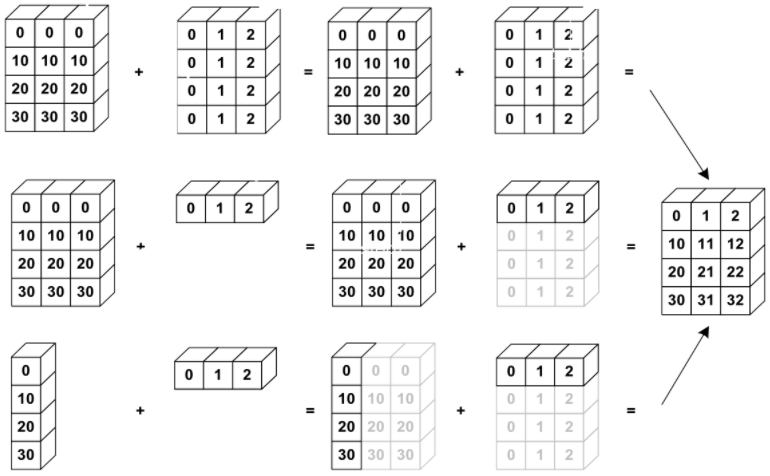

In [36]:
from numpy import ogrid
a = np.ogrid[0:5]
a

array([0, 1, 2, 3, 4])

## shape manipulation
```python               
# shape manipulation
a.ravel() # flatten the array
a.reshape(6, 2), np.reshape(a, (6, 2)) # ndarray.reshape may return a view 
                                       # (cf help(np.reshape))), or copy
a.shape = (6, 2), a.resize((2, 6)) # modify the array itself
a.T # The transposition is a view, share the same data
    # Same as self.transpose(), except that self is returned if self.ndim < 2

# stacking
np.vstack((a, b)) # vertical
np.hstack((a, b)) # horizontal
np.dstack((a, b)) # depth wise (along third axis)
np.concatenate(a, b, axis = 0 or 1 or ...) # for arrays of with more than two dimensions

# splitting
np.hsplit(a, 2)
np.dsplit(a, 2)
np.split(a, axis = 0) # split a into 2

# adding a dimension
z = np.array([1, 2, 3])
z # array([1, 2, 3])
z[:, np.newaxis] # array([[1], [2], [3]])
z[np.newaxis, :] # array([[1, 2, 3]])
```

# copies and views
A slicing operation creates a view on the original array,
which is just a way of accessing array data.
Thus, the original array data is not copied in memory.
**When modifying the view, the original array is modified as well**
```python
a = np.arange(10)
b = a # share the same object
np.may_share_memory(a,b) # True

c = a[::2] # create a new view, share the same data
np.may_share_memory(a,c) # True

d = a.view() # different objects, share the same data
np.may_share_memory(a,d) # True

e = a.copy() # copy method makes a complete copy of the array and its data
np.may_share_memory(a,e) # False
```

## indexing, slicing and iterating
```python
a = np.arange(12)
a[1] # 1 
a[:6:2] # array([0,2,4])
a[::-1] # array([11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0])

index = np.array([1, 2, 3, 8, 5])
a[index] # array([1, 2, 3, 8, 5])

a = np.reshape(3, 4)
i = np.array([[0,1],[1,2]])
j = np.array([[2,1],[3,3]])
a[i,j] # array([[ 2,  5],
       # [ 7, 11]])

a = np.arange(5)
a[[0,0,2]] = [1,2,3] # array([2, 1, 3, 3, 4])

# Multidimensional arrays
def f(x,y):
	return 10*x + y
b = np.fromfunction(f, (5,4), dtype = int) # array([[ 0,  1,  2],
                                           #       [10, 11, 12]])
b[1] # array([10, 11, 12])
b[1,:] # array([10, 11, 12])  
b[1,...] # array([10, 11, 12])

for row in b: # with respect to the first axis
for element in b.flat: # iterate over all the elements

# iteration
for row in b: # with respect to the first axis
    print(row) # [0 1 2]
               # [10 11 12]
               
for element in b.flat: # iterate over all the elements
    print(element, end = '') # 012101112
```

## math
```python
a = np.array([[ 0.47241611,  0.72747761,  0.43982429],
              [ 0.314428  ,  0.54312091,  0.48482687]])
       
a.sum(axis=0) # array([ 0.78684411,  1.27059851,  0.92465116])
a.min(axis=1) # array([ 0.43982429,  0.314428]) 
a.max()
a.cumsum(axis=1) # array([[ 0.47241611,  1.19989372,  1.63971801],
                        # [ 0.314428  ,  0.85754891,  1.34237578]])

np.exp(a), np.sqrt(a), np.average(a, axis=0)
np.ceil(a), np.floor(a)
mean median round std
sort transpose trace


# clip interval to the interval edges
a = np.arange(10)
np.clip(a, 2, 8) # array([2, 2, 2, 3, 4, 5, 6, 7, 8, 8])
array([1, 1, 2, 3, 4, 5, 6, 7, 8, 8])

a = np.array([[0.5, 1.5, 2.5],[0.6, 1.6, 2.6]]) 
np.clip(a, [1, 1, 1], [2, 2, 2], out = a)
a # array([[ 1. ,  1.5,  2. ],
         # [ 1. ,  1.6,  2. ]])
```

In [43]:
a = np.array([[0.5, 1.5, 2.5],[0.6, 1.6, 2.6]]) 
np.clip(a, [1, 1, 1], [2, 2, 2], out = a)
a

array([[ 1. ,  1.5,  2. ],
       [ 1. ,  1.6,  2. ]])